In [521]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-silhouettes/vehicle.csv


In [522]:
df = pd.read_csv('/kaggle/input/vehicle-silhouettes/vehicle.csv')

In [523]:
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [524]:
df.shape

(846, 19)

In [525]:
df.drop(['pr.axis_aspect_ratio','max.length_aspect_ratio','pr.axis_rectangularity','max.length_rectangularity','scaled_variance.1','elongatedness','scaled_radius_of_gyration.1','skewness_about.1','skewness_about.2'], axis =1,inplace = True)

In [526]:
df.dropna(axis =0 ,inplace = True)

In [527]:
df.reset_index(drop = True , inplace = True)

In [528]:
df.drop_duplicates(inplace = True)

In [529]:
df.reset_index(drop = True , inplace = True)

In [530]:
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,scatter_ratio,scaled_variance,scaled_radius_of_gyration,skewness_about,hollows_ratio,class
0,95,48.0,83.0,178.0,162.0,176.0,184.0,6.0,197,van
1,91,41.0,84.0,141.0,149.0,170.0,158.0,9.0,199,van
2,104,50.0,106.0,209.0,207.0,223.0,220.0,14.0,196,car
3,93,41.0,82.0,159.0,144.0,160.0,127.0,6.0,207,van
4,85,44.0,70.0,205.0,149.0,241.0,188.0,9.0,183,bus
5,97,43.0,73.0,173.0,153.0,176.0,172.0,13.0,204,bus
6,90,43.0,66.0,157.0,137.0,162.0,164.0,3.0,202,van
7,86,34.0,62.0,140.0,122.0,141.0,112.0,2.0,208,van
8,86,36.0,70.0,143.0,133.0,153.0,127.0,2.0,202,van
9,90,34.0,66.0,136.0,123.0,148.0,118.0,5.0,202,car


In [531]:
df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [532]:
df.shape

(823, 10)

In [533]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,scatter_ratio,scaled_variance,scaled_radius_of_gyration,skewness_about,hollows_ratio,class
0,95,48.0,83.0,178.0,162.0,176.0,184.0,6.0,197,2
1,91,41.0,84.0,141.0,149.0,170.0,158.0,9.0,199,2
2,104,50.0,106.0,209.0,207.0,223.0,220.0,14.0,196,1
3,93,41.0,82.0,159.0,144.0,160.0,127.0,6.0,207,2
4,85,44.0,70.0,205.0,149.0,241.0,188.0,9.0,183,0
5,97,43.0,73.0,173.0,153.0,176.0,172.0,13.0,204,0
6,90,43.0,66.0,157.0,137.0,162.0,164.0,3.0,202,2
7,86,34.0,62.0,140.0,122.0,141.0,112.0,2.0,208,2
8,86,36.0,70.0,143.0,133.0,153.0,127.0,2.0,202,2
9,90,34.0,66.0,136.0,123.0,148.0,118.0,5.0,202,1


In [534]:
df['class'].unique()

array([2, 1, 0])

In [535]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'scatter_ratio', 'scaled_variance', 'scaled_radius_of_gyration',
       'skewness_about', 'hollows_ratio', 'class'],
      dtype='object')

In [536]:
X = df.drop('class', axis = 1)
y = df['class']

In [537]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,scatter_ratio,scaled_variance,scaled_radius_of_gyration,skewness_about,hollows_ratio
0,95,48.0,83.0,178.0,162.0,176.0,184.0,6.0,197
1,91,41.0,84.0,141.0,149.0,170.0,158.0,9.0,199
2,104,50.0,106.0,209.0,207.0,223.0,220.0,14.0,196
3,93,41.0,82.0,159.0,144.0,160.0,127.0,6.0,207
4,85,44.0,70.0,205.0,149.0,241.0,188.0,9.0,183


In [538]:
y.head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int64

In [539]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(X)
df1

array([[ 0.16035725,  0.51649974,  0.05827476, ...,  0.29941855,
        -0.0684541 ,  0.17266937],
       [-0.3261829 , -0.61920828,  0.12179811, ..., -0.50486945,
         0.54170178,  0.44309163],
       [ 1.25507257,  0.84098774,  1.51931183, ...,  1.41304809,
         1.55862826,  0.03745825],
       ...,
       [ 1.49834264,  1.48996375,  1.20169507, ...,  0.79436501,
        -0.67860999,  0.71351388],
       [-0.93435808, -1.43042829, -0.25934199, ..., -0.81421098,
        -1.28876588, -0.09775288],
       [-1.05599311, -1.43042829, -1.0216222 , ..., -1.3400916 ,
        -1.08538058, -0.77380852]])

In [540]:
from sklearn.model_selection import train_test_split

In [541]:
X_train,X_test,y_train , y_test = train_test_split(X,y,test_size = 0.35, random_state =1 )

In [542]:
from sklearn.svm import SVC
model =SVC()
model.fit(X_train,y_train)

SVC()

In [543]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [544]:
y_pred = model.predict(X_test)

In [545]:
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1

0.6228373702422145

In [546]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 31,  38,   0],
       [  5, 105,  31],
       [ 24,  11,  44]])

In [547]:
import matplotlib.pyplot as plt
import seaborn as sns

In [548]:
corr = df.corr()
corr

,compactness,circularity,distance_circularity,radius_ratio,scatter_ratio,scaled_variance,scaled_radius_of_gyration,skewness_about,hollows_ratio,class
compactness,1.000000,0.689533,0.790323,0.689454,0.812545,0.763075,0.580792,0.233806,0.376237,-0.033354
circularity,0.689533,1.000000,0.796808,0.624086,0.858315,0.805756,0.935710,0.140686,0.048863,-0.158472
distance_circularity,0.790323,0.796808,1.000000,0.772204,0.908557,0.865893,0.704519,0.111554,0.344636,-0.063382
radius_ratio,0.689454,0.624086,0.772204,1.000000,0.743744,0.806571,0.544181,0.045946,0.470259,-0.195217
scatter_ratio,0.812545,0.858315,0.908557,0.743744,1.000000,0.950248,0.796292,0.069256,0.137857,-0.284289
scaled_variance,0.763075,0.805756,0.865893,0.806571,0.950248,1.000000,0.775767,0.034105,0.104515,-0.308146
scaled_radius_of_gyration,0.580792,0.935710,0.704519,0.544181,0.796292,0.775767,1.000000,0.160860,-0.103610,-0.241684
skewness_about,0.233806,0.140686,0.111554,0.045946,0.069256,0.034105,0.160860,1.000000,0.101036,0.122059
hollows_ratio,0.376237,0.048863,0.344636,0.470259,0.137857,0.104515,-0.103610,0.101036,1.000000,0.215387
class,-0.033354,-0.158472,-0.063382,-0.195217,-0.284289,-0.308146,-0.241684,0.122059,0.215387,1.000000


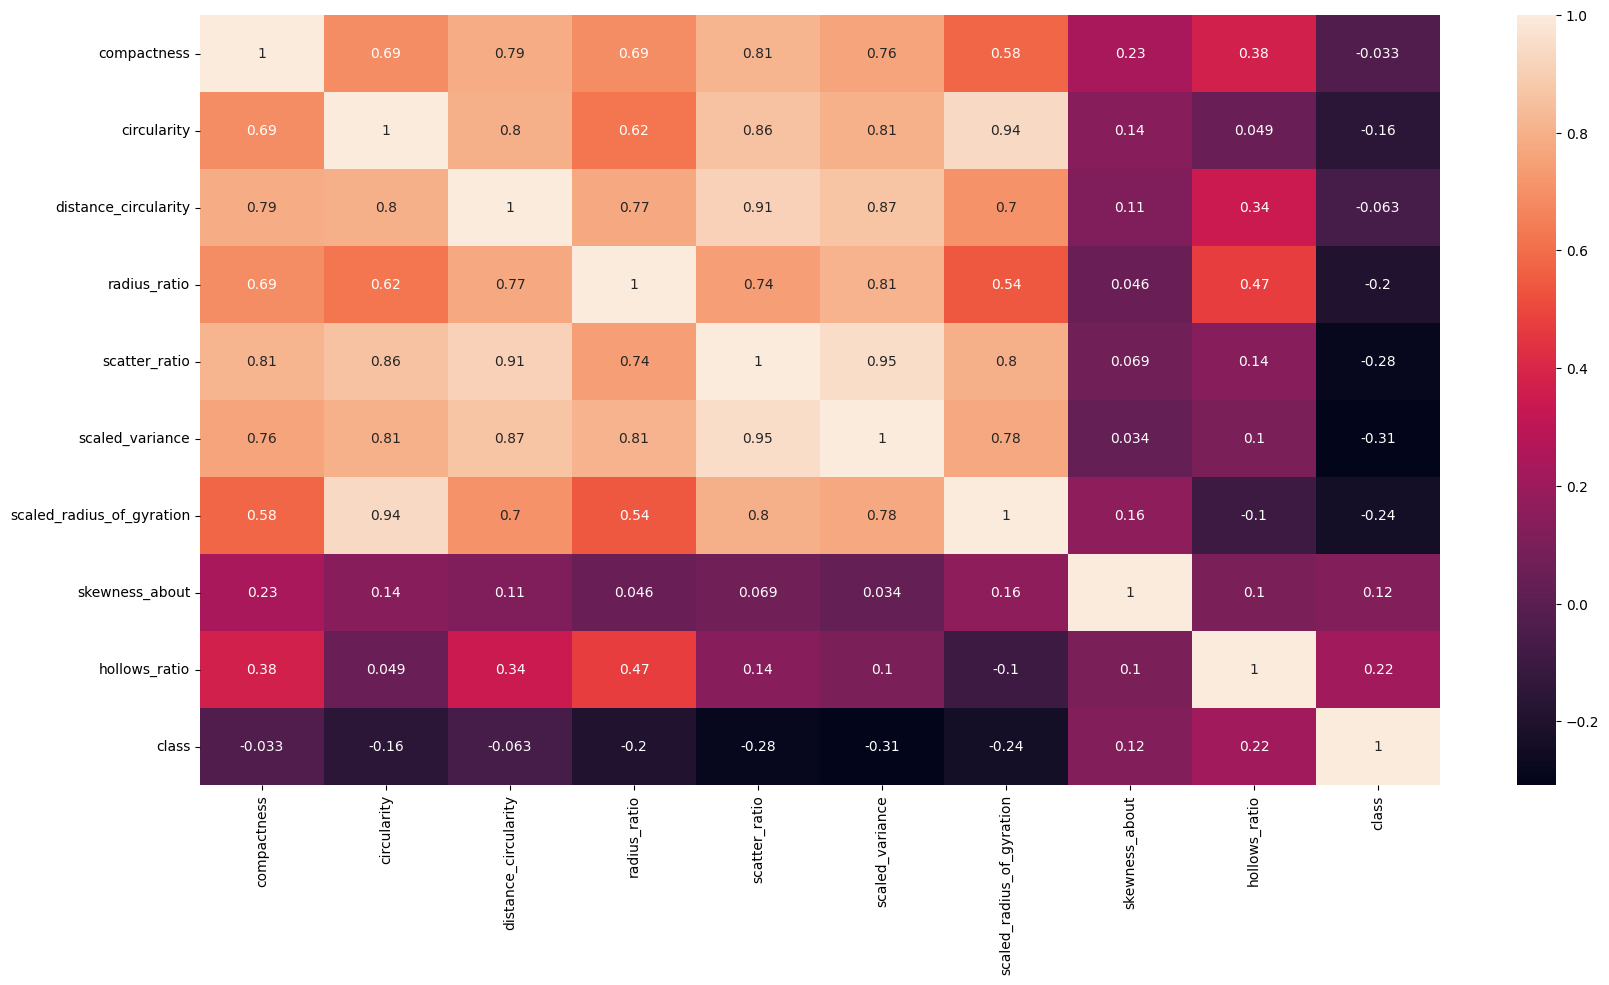

In [549]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)
plt.show()

**Principal Component Analysis**

In [550]:
from sklearn.decomposition import PCA

In [551]:
pca = PCA(n_components=6, whiten=True, svd_solver='auto', tol=10.0, iterated_power='auto')

In [552]:
X1 = pca.fit_transform(X)

In [553]:
pca.explained_variance_

array([3776.89327168,  528.2413181 ,  194.81358042,   80.36389586,
         26.96517189,   26.27431858])

In [554]:
pca.explained_variance_ratio_

array([0.80967099, 0.11324166, 0.04176314, 0.017228  , 0.00578066,
       0.00563255])

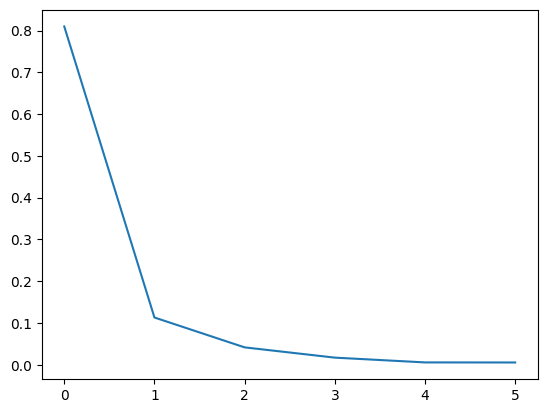

In [555]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [556]:
X1_train,X1_test,y_train , y_test = train_test_split(X1,y,test_size = 0.35, random_state =1 )

In [557]:
from sklearn.svm import SVC
model1 =SVC()
model1.fit(X1_train,y_train)

SVC()

In [558]:
accuracy2 = model1.score(X1_test,y_test)
accuracy2

0.8477508650519031

**Checking with Normalizer instead of StandardScaler**

In [559]:
import numpy as np
from sklearn.preprocessing import Normalizer

In [560]:
df1 = pd.read_csv('/kaggle/input/vehicle-silhouettes/vehicle.csv')

In [561]:
df1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [562]:
df1.dropna(axis = 0 ,inplace = True)

In [563]:
df1.drop_duplicates(inplace = True)

In [564]:
df1.reset_index(drop = True , inplace = True)

In [565]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = le.fit_transform(df1[column])
df1.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
5,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,0
6,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,2
7,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,2
8,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,2
9,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,1


In [566]:
X1 = df.drop('class', axis = 1)
y1 = df['class']

In [567]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
df1 = scaler.fit_transform(X1)
df1

array([[0.22402732, 0.11319275, 0.19572913, ..., 0.43390555, 0.01414909,
        0.46456192],
       [0.23291565, 0.10494002, 0.21499907, ..., 0.404403  , 0.02303561,
        0.50934302],
       [0.20891159, 0.10043826, 0.21292912, ..., 0.44192836, 0.02812271,
        0.393718  ],
       ...,
       [0.20978175, 0.10686995, 0.19988638, ..., 0.39581462, 0.00593722,
        0.39779369],
       [0.23127724, 0.09681373, 0.20976308, ..., 0.398012  , 0.        ,
        0.5244077 ],
       [0.25035977, 0.10603473, 0.194397  , ..., 0.38584859, 0.00294541,
        0.55962772]])

In [568]:
X1_train,X1_test,y1_train , y1_test = train_test_split(X1,y1,test_size = 0.35, random_state =1 )

In [569]:
from sklearn.svm import SVC
model =SVC()
model.fit(X1_train,y1_train)

SVC()

In [570]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [571]:
y1_pred = model.predict(X1_test)

In [572]:
accuracy3 = accuracy_score(y1_pred,y1_test)
accuracy3

0.6228373702422145

In [573]:
pca1 = PCA(n_components=6, whiten=True, svd_solver='auto', tol=10.0, iterated_power='auto')

In [574]:
X2 = pca1.fit_transform(X1)

In [575]:
pca1.explained_variance_

array([3776.89327168,  528.2413181 ,  194.81358042,   80.36389586,
         26.96517189,   26.27431858])

In [576]:
pca1.explained_variance_ratio_

array([0.80967099, 0.11324166, 0.04176314, 0.017228  , 0.00578066,
       0.00563255])

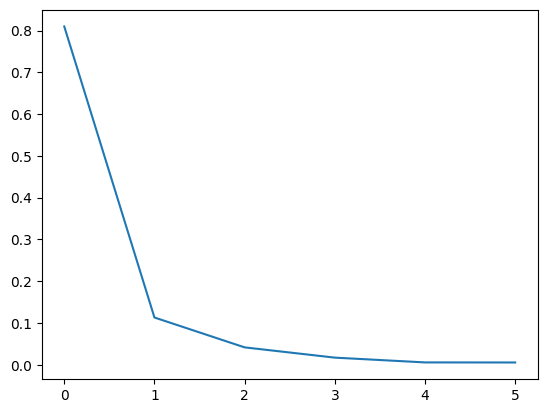

In [577]:
plt.plot(pca1.explained_variance_ratio_)
plt.show()

In [578]:
X2_train,X2_test,y2_train , y2_test = train_test_split(X2,y,test_size = 0.35, random_state =1 )

In [579]:
from sklearn.svm import SVC
model2 =SVC()
model2.fit(X2_train,y1_train)

SVC()

In [580]:
accuracy4 = model2.score(X2_test,y2_test)
accuracy4

0.8477508650519031

In [581]:
print(accuracy1,accuracy2,accuracy3,accuracy4)

0.6228373702422145 0.8477508650519031 0.6228373702422145 0.8477508650519031
